In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
# d = load_breast_cancer()
# X = d.data
# y = d.target
# x_data, test_x, y_data, test_y = train_test_split(X, y, stratify = y, test_size = 0.3, random_state = 42)
# train_x, val_x, train_y, val_y = train_test_split(x_data, y_data, stratify = y_data, test_size = 0.2, random_state = 42)
# train_x.shape, test_x.shape, val_x.shape, train_y.shape, test_y.shape, val_y.shape

((318, 30), (171, 30), (80, 30), (318,), (171,), (80,))

In [ ]:
# #내꺼 왜 오류남;;

# import numpy as np
# class Sg_l:
#     def __init__(self,lr=0.1,l1=0,l2=0):
#         self.w=None              # 가중치
#         self.b=None              # 절편
#         self.losses=[]           # 학습손실
#         self.val_losses=[]       # 검증손실
#         self.w_hy=[]             # 가중치 기록
#         self.lr=lr               # 학습률
#         self.l1=l1               # L1손실 하이퍼 파라미터
#         self.l2=l2               # L2손실 하이퍼 파라미터

#     def forpass(self,x):
#         z = x@self.w +self.b   # 선형 벡터(여러개 값) 출력 계산
#         return z

#     def backpass(self,x,err):
#         m = len(x)
#         w_g = (x.T@err) / m    # 가중치 기울기 계산
#         b_g = np.sum(err) / m  # 절편 기울기 계산
#         return w_g,b_g

#     def activation(self,z):
#         z = np.clip(z, -100, None)  # 발산방지
#         a = 1/(1+np.exp(-z))        # 시그모이드 계산
#         return a

#     def fit(self,x, y, epochs=100, val_x=None, val_y=None):
#         y = y.reshape(-1, 1)               # 타겟 열벡터화
#         val_y = val_y.reshape(-1, 1)       # 타겟 열벡터화
#         m = len(x)                         # 샘플 갯수
#         #1. 초기가중치 생성
#         self.w = np.ones(x.shape[1], 1) # 1 안적음
#         #2. 초기절편 생성
#         self.b=0
#         #3. 가중치 기록
#         self.w_hy.append(self.w.copy())

#         for i in range(epochs):
#             #loss=0
#             z = self.forpass(x)                 # 정방향 연산
#             a = self.activation(z)              # 활성화함수 적
#             err = -(y - a)                      # 오차 계산
#             w_g,b_g = self.backpass(x, err)     # 오차 역전파를 통한 기울기 도출
#             w_g = w_g + (self.l1 * np.sign(self.w) + self.l2 * self.w) / m #패널티 텀 적용
#             self.w = self.w - self.lr*w_g        # 가중치 갱신
#             self.b = self.b - self.lr*b_g        # 절편 갱신
#             self.w_hy.append(self.w.copy())     # 가중치 기록
#             a = np.clip(a, 1e-10, 1-1e-10)      # 발산방지
#             loss = np.sum(-(y * np.log(a) + (1-y) * np.log(1-a)))  # 손실값 도출

#             self.losses.append((loss + self.reg_loss()) / m)        # 학습 손실 기록
#             self.update_val_loss(val_x,val_y)                      # 검증 손실 기록

#     def reg_loss(self):
#         return self.l1*np.sum(np.abs(self.w))+self.l2/2*np.sum(self.w**2)

#     def update_val_loss(self,val_x,val_y):
#         if val_x is None:
#             return
#         z = self.forpass(val_x)                     # 정방향 연산
#         a = self.activation(z)                      # 활성화 함수 적용
#         a = np.clip(a, 1e-10, 1-1e-10)              # 발산방지
#         val_loss = np.sum(-(val_y * np.log(a) + (1 - val_y) * np.log(1-a)))  # 손실값 도축
#         self.val_losses.append((val_loss + self.reg_loss()) / len(val_y))  # 검증 손실 기록

#     def predict(self, x):
#         z = self.forpass(x) # 정방향 연산
#         return z >= 0       # 스텝함수 적용(계단함수)

#     def score(self,x,y):
#         return np.mean(self.predict(x) == y.reshape(-1, 1))

In [ ]:
# #내꺼 오류남;;

# class D_l(Sg_l):
#     def __init__(self, units = 10, lr = 0.1, l1 = 0, l2 = 0):
#         # 은닉층 뉴런 갯수
#         self.units = units
#         # 은닉 가중치
#         self.w1 = None
#         # 출력 가중치
#         self.w2 = None
#         # 은닉편향
#         self.b1 = None
#         # 출력편향
#         self.b2 = None
#         # 은닉 활성화 함수
#         self.a1 = None
#         # 학습률
#         self.lr = lr
#         # 학습손실
#         self.losses = []
#         # 검증손실
#         self.val_losses = []
#         # L1
#         self.l1 = l1
#         # L2
#         self.l2 = l2

#     def forpass(self, x):
#         z1 = (x@self.w1) + self.b1
#         self.a1 = self.activation(z1)
#         z2 = (z1@self.w2) + self.b2
#         return z2

#     def backpass(self, x, err):
#         m = len(x)
#         w2_g = (self.a1.T@err) / m
#         b2_g = np.sum(err) / m

#         h_err = (err@self.w2.T) * self.a1 * (1 - self.a1)
#         w1_g = (x.T@h_err) / m
#         b1_g = np.sum(h_err, axis = 0) / m
#         return w2_g, b2_g, w1_g, b1_g

#     def init_w(self, n_f):  # 가중치, 편향 초기화
#         self.w1 = np.ones((n_f, self.units))
#         self.b1 = np.zeros(self.units)
#         self.w2 = np.ones((self.units, 1))
#         self.b2 = 0

#     def fit(self, x, y, epochs = 100, val_x = None, val_y = None):
#         y = y.reshape(-1, 1)
#         val_y = val_y.reshape(-1, 1)
#         m = len(x)
#         self.init_w(x.shape[1])
#         for i in range(epochs):
#             a = self.trainf(x, y, m)
#             a = np.clip(a, 1e-10, 1-1e-10)
#             loss = np.sum(-(y*np.log(a)+(1-y)*np.log(1-a)))
#             self.losses.append((loss + self.reg_loss()) / m)
#             self.update_val_loss(val_x, val_y)

#     def trainf(self, x, y, m):
#         z = self.forpass(x)
#         a = self.activation(z)
#         err = -(y - a)
#         w2_g, b2_g, w1_g, b1_g = self.backpass(x, err)
#         w1_g += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
#         w2_g += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
#         self.w1 -= self.lr * w1_g
#         self.w2 -= self.lr * w2_g
#         self.b1 -= self.lr * b1_g
#         self.b2 -= self.lr * b2_g
#         return a

#     def reg_loss(self):
#         return self.l1*(np.sum(np.abs(self.w1))+np.sum(np.abs(self.w2)))+self.l2/2*(np.sum(self.w1**2)+np.sum(self.w2**2))

In [ ]:
d = load_breast_cancer()
X = d.data
y = d.target

x_data, test_x, y_data, test_y = train_test_split(X, y, stratify = y, test_size=0.2, random_state=42)
train_x, val_x, train_y, val_y = train_test_split(x_data, y_data, stratify = y_data, test_size=0.2, random_state=42)

In [ ]:
class Sg_l:
  def __init__(self,lr=0.1,l1=0,l2=0):
    self.w=None         #가중치
    self.b=None         #절편
    self.losses=[]      #학습손실
    self.val_losses=[]  #검증손실
    self.w_hy=[]        #가중치 기록
    self.lr=lr          #학습률
    self.l1=l1          #L1손실 하이퍼 파라미터
    self.l2=l2          #L2손실 하이퍼 파라미터

  def forpass(self,x):
    z = x@self.w +self.b #선형 백터(여러개 값) 출력 계산
    return z

  def backpass(self,x,err):
     m = len(x)
     w_g = (x.T@err)/m      #가중치 기울기 계산
     b_g = np.sum(err)/m    #절편 기울기 계산
     return w_g,b_g

  def activation(self,z):
    z = np.clip(z, -100, None) #발산방지
    a = 1/(1+np.exp(-z))       #시그모이드 계산
    return a

  def fit(self,x, y, epochs=100, val_x=None, val_y=None):
    y = y.reshape(-1,1)                   #타겟 열백터화
    val_y = val_y.reshape(-1,1)           #타겟 열백터화
    m = len(x)                            #샘플 갯수
    #1. 초기가중치 생성
    self.w = np.ones((x.shape[1],1))
    #2. 초기절편 생성
    self.b=0
    #3. 가중치 기록
    self.w_hy.append(self.w.copy())

    for i in range(epochs):
      z = self.forpass(x)             #정방향 연산
      a = self.activation(z)          #활성화함수 적용
      err = -(y-a)                    #오차 계산
      w_g,b_g = self.backpass(x,err)  #오차 역전파를 통한 기울기 도출
      w_g += (self.l1*np.sign(self.w)+self.l2*self.w)/m #패널티 텀 적용
      self.w -= self.lr*w_g           #가중치 갱신
      self.b -= self.lr*b_g           #절편 갱신
      self.w_hy.append(self.w.copy()) #가중치 기록
      a = np.clip(a, 1e-10, 1-1e-10)  #발산방지
      loss = np.sum(-(y*np.log(a)+(1-y)*np.log(1-a))) #손실값 도출
      self.losses.append((loss+self.reg_loss())/m)    #학습 손실 기록
      self.update_val_loss(val_x,val_y)               #검증 손실 기록

  def reg_loss(self):
    return self.l1*np.sum(np.abs(self.w))+self.l2/2*np.sum(self.w**2)

  def update_val_loss(self,val_x,val_y):
    if val_x is None:
      return
    z = self.forpass(val_x)           #정방향 연산
    a = self.activation(z)            #활성화 함수 적용
    a = np.clip(a, 1e-10, 1-1e-10)    #발산방지
    val_loss = np.sum(-(val_y*np.log(a)+(1-val_y)*np.log(1-a)))#손실값 도출
    self.val_losses.append((val_loss+self.reg_loss())/len(val_y))#검증 손실 기록

  def predict(self, x):
    z = self.forpass(x) #정방향 연산
    return z>=0         #스탭함수 적용

  def score(self,x,y):
    return np.mean(self.predict(x)==y.reshape(-1,1))

In [ ]:
# 2층 신경망
class D_l(Sg_l):
  def __init__(self, units = 10, lr = 0.1, l1 = 0, l2 = 0):
    # 은닉 뉴런 갯수
    self.units = units
    # 은닉 가중치
    self.w1 = None
    # 출력 가중치
    self.w2 = None
    # 은닉 편향
    self.b1 = None
    # 출력 편향
    self.b2 = None
    # 은닉 활성화 함수
    self.a1 = None
    # 학습률
    self.lr = lr
    # 학습 손실
    self.losses = []
    # 검증 손실
    self.val_losses = []
    # l1
    self.l1 = l1
    # l2
    self.l2 = l2

  def forpass(self,x):
    z1=(x@self.w1)+self.b1
    self.a1=self.activation(z1)
    z2=(self.a1@self.w2)+self.b2
    return z2

  def backpass(self,x,err):
    m=len(x)
    w2_g=(self.a1.T@err)/m
    b2_g=np.sum(err)/m

    h_err = (err@self.w2.T)*self.a1*(1-self.a1)
    w1_g=(x.T@h_err)/m
    b1_g=np.sum(h_err,axis=0)/m
    return w2_g,b2_g,w1_g,b1_g

  def init_w(self,n_f): #가중치, 편향 초기화
    self.w1=np.ones((n_f,self.units))
    self.b1=np.zeros(self.units)
    self.w2=np.ones((self.units,1))
    self.b2=0

  def fit(self,x,y,epochs=100,val_x=None,val_y=None):
    y=y.reshape(-1,1)
    val_y=val_y.reshape(-1,1)
    m = len(x)
    self.init_w(x.shape[1])
    for i in range(epochs):
      a = self.trainf(x,y,m)
      a = np.clip(a,1e-10,1-1e-10)
      loss = np.sum(-(y*np.log(a)+(1-y)*np.log(1-a)))
      self.losses.append((loss+self.reg_loss())/m)
      self.update_val_loss(val_x,val_y)


  def trainf(self,x,y,m):
    z = self.forpass(x)
    a = self.activation(z)
    err = -(y-a)
    w2_g,b2_g,w1_g,b1_g = self.backpass(x,err)
    w1_g += (self.l1*np.sign(self.w1)+self.l2*self.w1)/m
    w2_g += (self.l1*np.sign(self.w2)+self.l2*self.w2)/m
    self.w1 -= self.lr*w1_g
    self.w2 -= self.lr*w2_g
    self.b1 -= self.lr*b1_g
    self.b2 -= self.lr*b2_g
    return a

  def reg_loss(self):
    return self.l1*(np.sum(np.abs(self.w1))+np.sum(np.abs(self.w2)))+self.l2/2*(np.sum(self.w1**2)+np.sum(self.w2**2))

In [ ]:
d_l_m = D_l(l2 = 0.01)
d_l_m.fit(train_x, train_y, 100, val_x, val_y)
d_l_m.score(train_x, train_y), d_l_m.score(test_x, test_y), d_l_m.score(val_x, val_y)

(0.6263736263736264, 0.631578947368421, 0.6263736263736264)

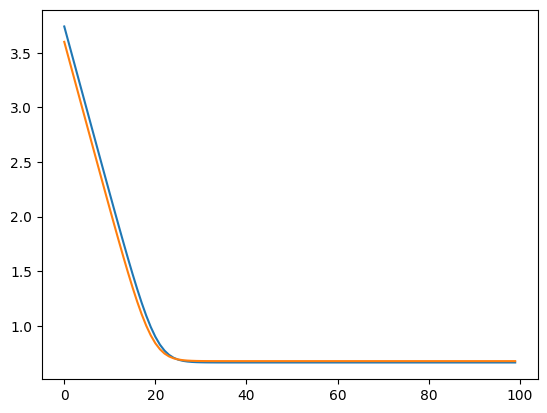

In [ ]:
plt.plot(d_l_m.losses)
plt.plot(d_l_m.val_losses)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_x)
s_train_x = ss.transform(train_x)
s_test_x = ss.transform(test_x)
s_val_x = ss.transform(val_x)

d_l_m = D_l(l2 = 0.01)
d_l_m.fit(s_train_x, train_y, 8000, s_val_x, val_y)
d_l_m.score(s_train_x, train_y), d_l_m.score(s_test_x, test_y), d_l_m.score(s_val_x, val_y)

(0.9862637362637363, 0.9736842105263158, 0.978021978021978)

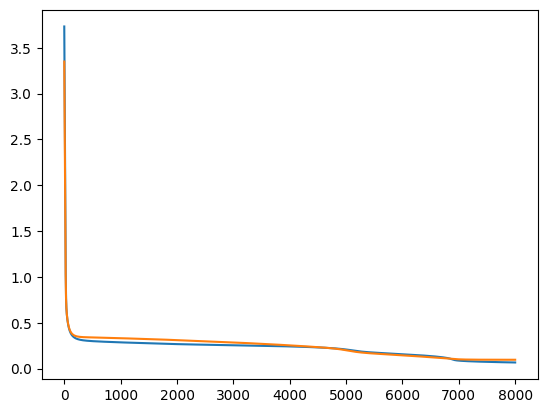

In [ ]:
plt.plot(d_l_m.losses)
plt.plot(d_l_m.val_losses)

In [ ]:
# 풀배치로 학습시킬 경우 - 초기 가중치의 영향을 많이 받음
# 그래서 미니배치로 바꿔서 하는경우가 있음

In [ ]:
class R_D_L(D_l):
  def init_w(self, n):
    np.random.seed(42)
    self.w1 = np.random.normal(0, 1, (n, self.units))
    self.b1 = np.zeros(self.units)
    self.w2 = np.random.normal(0, 1, (self.units, 1))
    self.b2 = 0

In [ ]:
n_m = R_D_L()
n_m.fit(s_train_x, train_y, 10000, s_val_x, val_y)

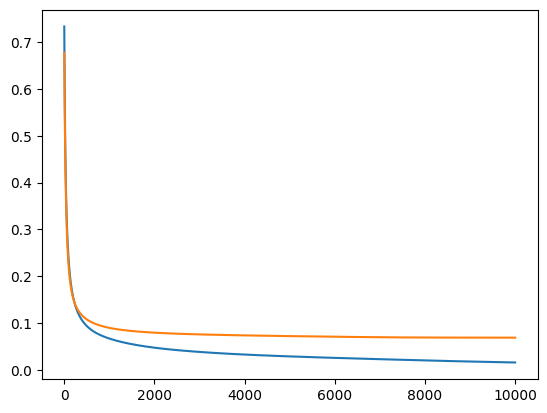

In [ ]:
plt.plot(n_m.losses)
plt.plot(n_m.val_losses)

In [ ]:
class MinibatchNN(R_D_L):
    def __init__(self, units = 10, lr = 0.1, l1 = 0, l2 = 0, batch_size = 32):
        super().__init__(units, lr, l1, l2)
        self.batch_size = batch_size

    def fit(self, x, y, epochs = 100, val_x = None, val_y = None):
        val_y = val_y.reshape(-1, 1)
        self.init_w(x.shape[1])
        np.random.seed(42)
        for i in range(epochs):
            loss = 0
            for x_b, y_b in self.gen_batch(x, y):
                y_b = y_b.reshape(-1, 1)
                m = len(x)
                a = self.trainf(x_b, y_b, m)
                a = np.clip(a, 1e-10, 1e-10)
                loss += np.sum(-(y_b * np.log(a) + (1 - y_b) * np.log(1 - a)))
            self.losses.append((loss + self.reg_loss()) / len(x))
            self.update_val_loss(val_x, val_y)

    def gen_batch(self, x, y):
        i_l= len(x)
        bins = i_l // self.batch_size
        if i_l % self.batch_size:
            bins += 1
        idxs = np.random.permutation(np.arange(len(x)))
        x = x[idxs]
        y = y[idxs]
        for i in range(bins):
            st_idx = self.batch_size * i
            end_idx = self.batch_size * (i + 1)
            yield x[st_idx: end_idx], y[st_idx: end_idx]



In [ ]:
m = MinibatchNN()
m.fit(s_train_x, train_y, 100, s_val_x, val_y)

In [ ]:
from sklearn.neural_network import MLPClassifier
m = MLPClassifier(hidden_layer_sizes = (10,), activation = "logistic",
                  solver = "sgd", alpha = 0.01, batch_size = 32,
                  learning_rate_init = 0.1, max_iter = 1000)
m.fit(s_train_x, train_y)

MLPClassifier(activation='logistic', alpha=0.01, batch_size=32,
              hidden_layer_sizes=(10,), learning_rate_init=0.1, max_iter=1000,
              solver='sgd')

In [ ]:
m.score(s_train_x, train_y), m.score(s_test_x, test_y), m.score(s_val_x, val_y)

(0.9972527472527473, 0.9736842105263158, 0.978021978021978)

#mpg 데이터로 딥러닝 테스트

In [ ]:
from seaborn import load_dataset
df = load_dataset('mpg')
df.dropna(axis = 0, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df['origin']

0         usa
1         usa
2         usa
3         usa
4         usa
        ...  
393       usa
394    europe
395       usa
396       usa
397       usa
Name: origin, Length: 398, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['origin'] = encoder.fit_transform(df['origin'])

In [ ]:
X = df.drop(['mpg', 'name'], axis = 1)
y = df['mpg'].values
s_y = (y - y.min()) / (y.max() - y.min())

In [ ]:
X

In [ ]:
from sklearn.model_selection import train_test_split # 데이터셋 나누기
x_data, test_x, y_data, test_y = train_test_split(X, s_y, test_size=0.2, random_state=42)
train_x, val_x, train_y, val_y = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler().fit(train_x)
s_train_x = s.transform(train_x)
s_test_x = s.transform(test_x)
s_val_x = s.transform(val_x)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
m = Sequential()
#m.add(Dense(128, activation = 'relu'))
m.add(Dense(64, activation = 'relu'))
m.add(Dense(32, activation = 'relu'))
m.add(Dense(16, activation = 'relu'))
m.add(Dense(1, activation = 'LeakyReLU'))
m.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mae'])

In [ ]:
hy = m.fit(s_train_x, train_y, epochs = 2000, validation_data = (s_val_x, val_y), batch_size = 32)

In [ ]:
m.evaluate(s_train_x, train_y)[0] + m.evaluate(s_test_x, test_y)[0] + m.evaluate(s_val_x, val_y)[0]

2/2 [==============================] - 0s 6ms/step - loss: 0.0048 - mae: 0.0497


0.013757365755736828

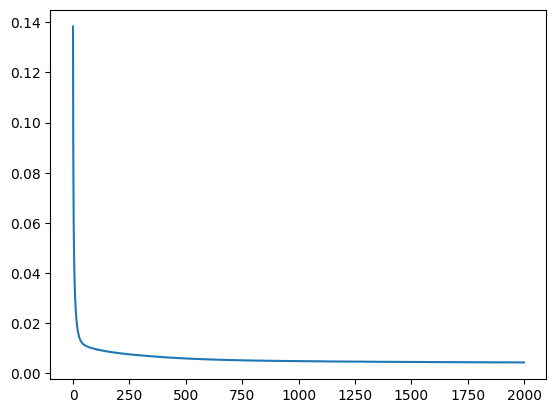

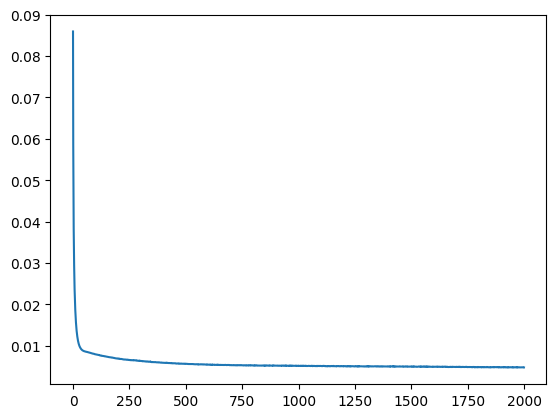

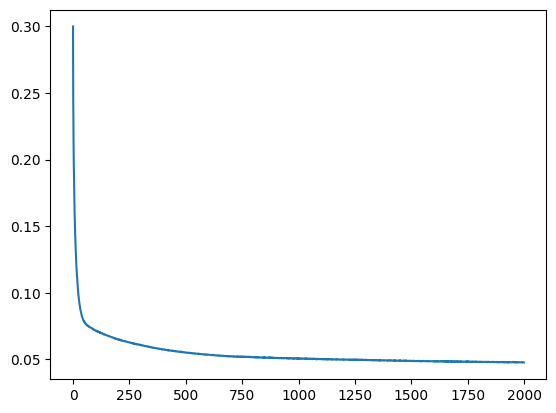

In [ ]:
plt.plot(hy.history['loss'])
plt.show()
plt.plot(hy.history['val_loss'])
plt.show()
plt.plot(hy.history['mae'])
plt.show()

In [ ]:
from sklearn.metrics import r2_score

train_py = m.predict(s_train_x)
train_ty = train_y.reshape(-1, 1)

test_py = m.predict(s_test_x)
test_ty = test_y.reshape(-1, 1)

val_py = m.predict(s_val_x)
val_ty = val_y.reshape(-1, 1)

train_py.shape, train_ty.shape, test_py.shape, test_ty.shape, val_py.shape, val_ty.shape

2/2 [==============================] - 0s 4ms/step


((250, 1), (250, 1), (79, 1), (79, 1), (63, 1), (63, 1))

In [ ]:
r2_score(train_ty, train_py), r2_score(test_ty, test_py), r2_score(val_ty, val_py)

(0.9102456413843275, 0.8696143591206005, 0.8535313107279454)